# Projekt 3 i databearbetning - **"Hemlisar"**

In [252]:
# imports
import numpy as np
import matplotlib.pyplot as plt # for plotting
from scipy.io.wavfile import write # for exporting as wav files
import matplotlib.image as img # for photos as data
import csv # for exporting as csv

## 1. Skapa en ljudfil med numpy

chatGPT help:

Understanding a Sine Wave

A sine wave represents a pure tone. It's defined mathematically as:
    
    y(t)=A⋅sin⁡(2πft+ϕ)
    y(t)=A⋅sin(2πft+ϕ)

- Amplitude (A): Controls the volume. Higher amplitude = louder sound.
- Frequency (f): Determines the pitch. Higher frequency = higher tone.
    - Frequency is measured in Hertz (Hz), e.g., 440 Hz = A4 note.
- Phase (φ): Determines the starting point of the wave. It’s not crucial unless you’re mixing multiple waves.
- Time (t): Specifies how long the wave is played.

## sine wave C Major

3 waves with the right frequency

C E G = major third, minor third 

    C = 261.63, E = 329.6276, G = 391.9954

In [253]:
# variables for the sound wave
duration = 2
sampleRate = 8000

In [254]:
# the frequencies for a C major ( from the middle of the piano )
cCord = [261.63, 329.6276, 391.9954]

- **First we create a list for the notes**
- **Then we loop for each note**
- **And create the sine wave**
- **Append the sine wave to the list**
- **Sum the list for a cMajor variable**

In [255]:
cMajorWaves = []
for freq in cCord:
    # from 0 to 2, 8000 * 2
    t = np.linspace(0, duration, int(sampleRate * duration))
    cMajorWaves.append(np.sin(2 * np.pi * freq * t))
cMajor = sum(cMajorWaves)

In [256]:
# look at the combined waves data
cMajor

array([0.        , 0.76312576, 1.47209676, ..., 1.2008175 , 1.60675871,
       1.93971991])

## plot the waves 

to see how the waves look

we need to zoom in to see the wave

0.01s at the beginning is shown

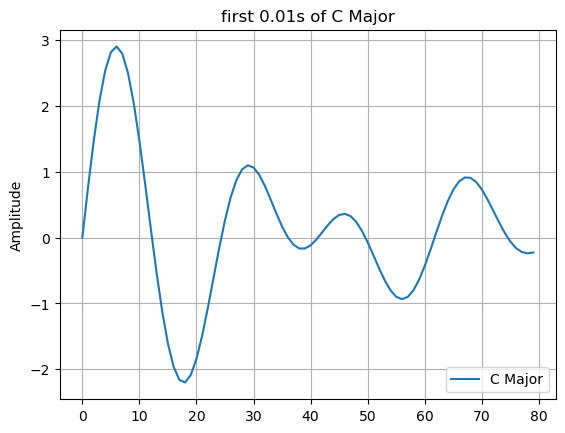

In [257]:
zoom = int(sampleRate * 0.01)
plt.plot(cMajor[:zoom], label="C Major")
plt.legend(loc="lower right")
plt.title("first 0.01s of C Major")
plt.ylabel("Amplitude")
plt.grid()

In [258]:
# export the sound as a wav file
file = "C-Major.wav"
write(file, int(sampleRate * duration), cMajor)

## export t and cMajor as csv

we already imported the package for csv exporting

Export numpy ndarray and regular python list

file names: t = t.csv and cMajor = C-Major.csv

In [259]:
print(type(cMajor))
print(type(t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [260]:
# t
np.savetxt("t.csv", t, delimiter=",", fmt='%f')

In [261]:
# cMajor
np.savetxt("C-Major.csv", cMajor, delimiter=",", fmt='%f')

## 2. RGB komposition

- Choose pokemon
- Crop the poke image
- Split image into 3 different arrays, [R][G][B]
- imshow a B/W version of poke
- Combine RGB with numpy and show results (its the same as original).

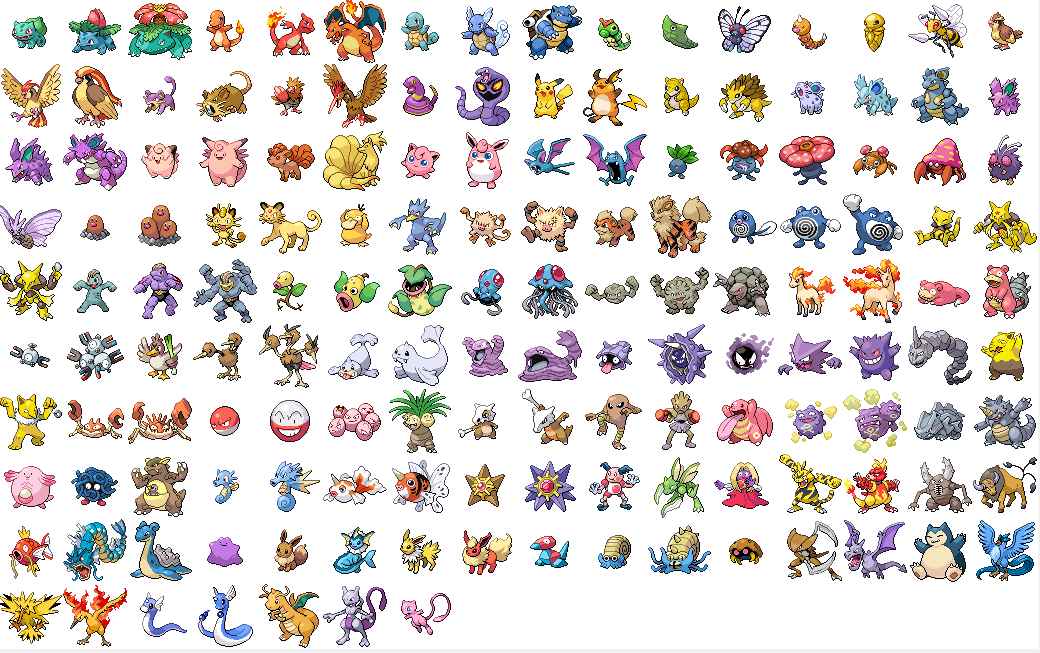

Very hard choices

**I CHOOSE YOU**

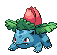

**Ivysaur !!!**

## Cropped image:

In [262]:
ivysaurJPG = img.imread("ivysaur.jpg")
ivysaurJPG.shape

(64, 64, 3)

## Split image into separate color channels:

R, G, B

In [263]:
# all rows, all columns, only red values
ivysaurRed = ivysaurJPG[:,:,0]

We use advanced index syntax to get the red, green and blue values only respectivly

In [264]:
# green, blue
ivysaurGreen = ivysaurJPG[:,:,1]
ivysaurBlue = ivysaurJPG[:,:,2]

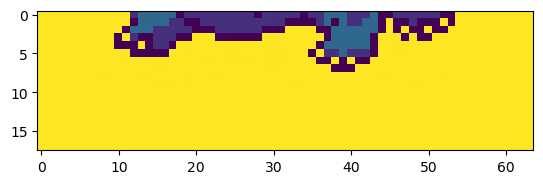

In [265]:
# plot bottom quarter of the red image
plt.imshow(ivysaurRed[-18:, :64])

In [266]:
ivysaurRed[:3,:3]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

## Display single color channels in black&white

with color map attribute "cmap"

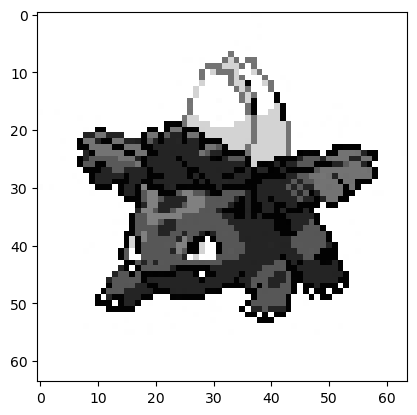

In [267]:
# for red color
plt.imshow(ivysaurRed, cmap="gray")

here everything is almost completely black except for white parts and the flower on ivysaurs back, which is read ofcourse!

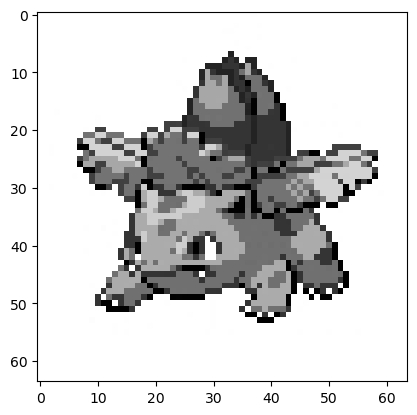

In [268]:
# for green color
plt.imshow(ivysaurGreen, cmap="gray")

the leaves are really light but it seems like the bodys blue color has some shades of green which makes the body light too.

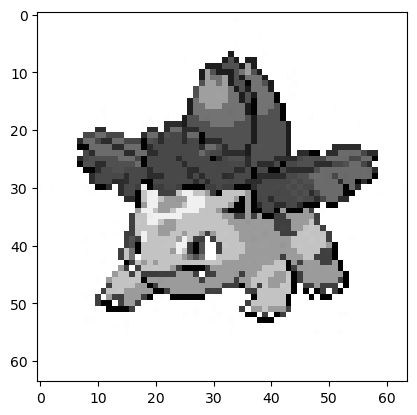

In [269]:
# for blue color
plt.imshow(ivysaurBlue, cmap="gray")

the blue body is really ligth since the blue hues in that area have a high luminance.

## Combine B&W images back together

with numpy

In [270]:
type(ivysaurRed)

numpy.ndarray

**np.stack = "Stack a sequence of arrays along a new axis."**

**axis=-1 means to stack column wise:**

In [271]:
coloredIvysaur = np.stack((ivysaurRed, ivysaurGreen, ivysaurBlue), axis=-1)
coloredIvysaur.shape

(64, 64, 3)

In [272]:
coloredIvysaur[28:32,:2] # look at row 28-32, two columns

array([[[255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255]],

       [[253, 255, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

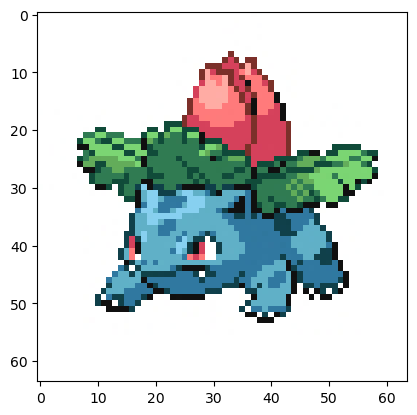

In [273]:
# plot the image (human visible)
plt.imshow(coloredIvysaur)

### and its back to its original beauty!!! 

What a beautiful pokemans!! 

its a shame he evolves into obesity (always was my favorite pokemans but the only starter i dont like the final form of)

## 3. Göm information i bilder

1. Ladda alltså ner fabio.png (och lenargba.png ifall du vill) från ItsLearning,
2. Gör en jupyter notebook där du visar hur du kan se på alphakanalen
3. Skapa hemlig information (troligen lättast med att skapa en bild med nästan genomskinlig text i gimp, och sedan läsa in den, men manuell modifikation av numpy arrays är ju också möjlig)
4. Göm informationen i alphakanalen av fabios bild (kombinera numpy arrays)
5. Illustrera hur man får fram meddelandet från alphakanalen (tips: clim)
6. Gör en before/after figur med imshow och pseudofärg där meddelande syns
7. Bonuspoäng ifall du lyckas illustrera den gömda datan i ett histogram

## Import image(png) and look at the data

In [274]:
fabioPNG = img.imread("fabio64.png")
fabioPNG[:1,:1] # first row, first column

array([[[0.11372549, 0.1764706 , 0.21176471, 1.        ]]], dtype=float32)

In [275]:
fabioPNG.shape

(64, 64, 4)

In [276]:
type(fabioPNG)

numpy.ndarray

## Alpha channel

RGB(A)

In [277]:
exampleRGBA = img.imread("lenargba.png")

**example of a rgba image**

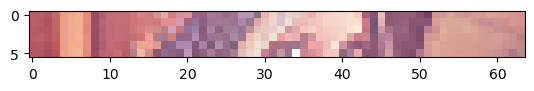

In [278]:
# middle slice of the picture
plt.imshow(exampleRGBA[28:34,:])

In [279]:
exampleRGBA[:2,:2]

array([[[0.88235295, 0.5294118 , 0.48235294, 0.92941177],
        [0.8784314 , 0.5176471 , 0.4627451 , 0.9254902 ]],

       [[0.88235295, 0.5058824 , 0.40784314, 0.9254902 ],
        [0.88235295, 0.5137255 , 0.42352942, 0.92156863]]], dtype=float32)

**so there is values, the 4th one is for alpha**

## save alpha channel values of our desired image

desired image = fabio.png(fabioPNG)


In [280]:
fabioPNG.shape

(64, 64, 4)

fabioPNG already has 4 values, 4th one being the alpha (RGBA)

In [281]:
fabioPNG[:2,:2]

array([[[0.11372549, 0.1764706 , 0.21176471, 1.        ],
        [0.13333334, 0.21176471, 0.25882354, 1.        ]],

       [[0.09019608, 0.15294118, 0.1882353 , 1.        ],
        [0.10980392, 0.18431373, 0.22352941, 1.        ]]], dtype=float32)

In [282]:
# all rows, all columns, only 4th values (alpha)
alphaChannel = fabioPNG[:,:,3]

In [283]:
alphaChannel[:,:]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

**or in 0 to 255 format**

In [284]:
type(alphaChannel)

numpy.ndarray

In [285]:
alphaChannel255 = np.int_(alphaChannel * 255)

In [286]:
alphaChannel255[:,:]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

255 = 1

## Hemlis!

### hide a hidden message inside a image

- create secret img file
- add secret file into real images alhpa channel (numpy arrays can easily be stacked)
- display the hidden message


**Read the secret in**

In [288]:
secret = img.imread("hemlis1.png")
secret.shape

(64, 64, 4)

**Look at the secret**

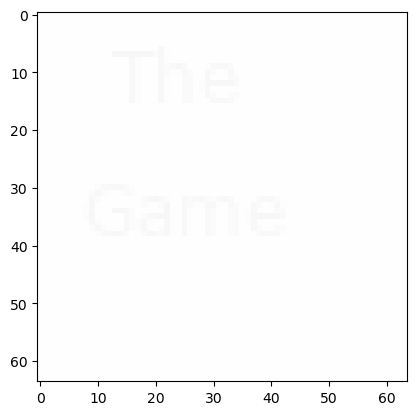

In [289]:
plt.imshow(secret)

In [290]:
secret[:2,:2]

array([[[0.99607843, 0.99607843, 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 0.99607843, 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 0.99607843, 1.        ]]], dtype=float32)

**Stack the images ontop of eachother**

In [291]:
type(fabioPNG)

numpy.ndarray

In [292]:
type(secret)

numpy.ndarray

In [293]:
fabioPNG.shape

(64, 64, 4)

In [296]:
# convert to 0 - 255 instead of 0 - 1 format.
secret255 = np.int_(secret * 255)

In [295]:
# convert to 0 - 255 instead of 0 - 1 format.
fabio255 = np.int_(fabioPNG * 255)

In [320]:
secret255[15:25,15:25]

array([[[254, 254, 254, 255],
        [248, 248, 248, 255],
        [252, 252, 252, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [248, 248, 248, 255],
        [253, 253, 253, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
    

In [316]:
secret_grayscale = secret255[:, :, 0]  # Use the first channel as grayscale

In [333]:
# combine them on the alpha channel
fabio255[:,:,3] = secret_grayscale
fabio255[15:25,15:25, 3]

array([[254, 248, 252, 254, 254, 254, 248, 253, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254],
       [254, 254, 254, 254, 254, 254, 254, 254, 254, 254]])

In [ ]:
specialFabio.shape

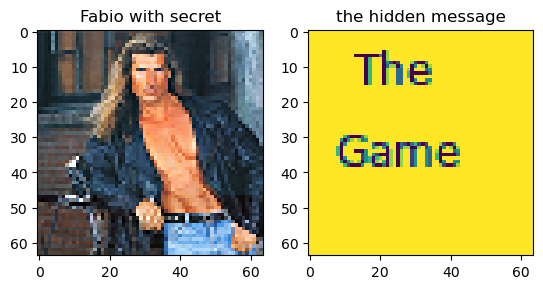

In [343]:
# original image with hidden message
fig = plt.figure()

fig.add_subplot(1, 2, 1) # 1 - 2 plots, we are writing in the plot index = 1
plt.title("Fabio with secret")
plt.imshow(fabio255)

fig.add_subplot(1, 2, 2) # -||-, we are writing in the plot index =  2
plt.title("the hidden message")
# fabios alpha channel in grayscale with full display range
plt.imshow(fabio255[:,:,3], clim=(248))

ChatGPT small helped abit with the this hidden message part. Could not really understand how you put and image (2d array of 3 values) into one channel, maybe I didnt understand the instructions very well? But atleast this time the project is on time finished.....

tack för kursen, det var jätte intressant, kunde t.o.m. bli något man arbetar med.